In [132]:
import pandas as pd 
import numpy as np

In [133]:
df=pd.read_csv('MR data - Compiled Data Set.csv')
df.fillna(0,inplace=True)
df

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,"Top cop stirs row, says girl filed case after ...",LUCKNOW: Hours after the horrific crime in Unn...,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0
462,Lucknow,Unnao girl passes away after 40-hour battle fo...,LUCKNOW/UNNAO: The Unnao gang-rape survivor wh...,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0
463,Lucknow,"Lucknow: Stalker thrashes dad, girl poisons he...",LUCKNOW: A 17-year-old girl consumed poison at...,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0
464,Lucknow,Uttar Pradesh: Woman accuses boss of harassment,LUCKNOW: A 30-year-old employee of a real esta...,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0


In [134]:
df.drop(df.columns[[1,2]],axis=1,inplace=True)
df.rename(columns={'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other':'Murder'},inplace=True)
df.head(15)
df.iloc[0,1]


0

In [135]:
df.rename(columns={'Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act':'CAW'},inplace=True)
df.columns = [i for i in range(0,len(df.columns))] 
df[df[10]>0]


,0,1,2,3,4,5,6,7,8,9,10
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
6,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.0,1.0
19,Ghaziabad,0,0.0,0.0,0.0,1.0,0.0,0.0,"4,7",0.0,1.0
25,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0,1.0
26,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"1,10",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
447,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1.0
453,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1.0
458,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0,1.0
459,Lucknow,Unknown reasons,1.0,1.0,1.0,0.0,0.0,0.0,1,1.0,1.0


In [136]:
reasons={0:0,'Property Disputes':1,'Family Dispute':2,'Petty Quarrels':3,'Money Disputes':4, 'Personal Vendetta':5, 'Love Affairs':6, 'Casteism':7,'Unknown reasons':8 }

df[1]=df[1].apply(lambda x: reasons[x])


In [137]:
df[11]=0
df[12]=0
for i in range(0,len(df)):
    #print(df.iloc[i,8])
    if ',' in str(df.iloc[i,8]):
        col=df.iloc[i,8].split(',')
        #print(col)
        df.iloc[i,8]=int(col[0])
        df.iloc[i,11]=int(col[1])
        #print(col[1])
        if len(col)>2:
            df.iloc[i,12]=int(col[2])
    elif int(df.iloc[i,8])>100:
        df.iloc[i,11]=int(df.iloc[i,8])%100
        df.iloc[i,8]=int(df.iloc[i,8])//100


df.columns=[0,1,2,3,4,5,6,7,8,11,12,9,10]
df.sort_index(axis=1,inplace=True)



In [141]:
m_df=df.loc[:,1:4]
#df[7].value_counts()
#df[5].sum()+df[6].sum()+df[7].sum()
reason=['Property Disputes','Family Dispute','Petty Quarrels','Money Disputes','Personal Vendetta','Love Affairs','Casteism','Unknown reasons']
dd=m_df.groupby(by=1).sum()
d=dd[2]+dd[3]+dd[4]
rr=np.array(d)
rr=rr[rr>0]
rr

array([20., 20., 19., 16., 16., 30.,  2., 51.])

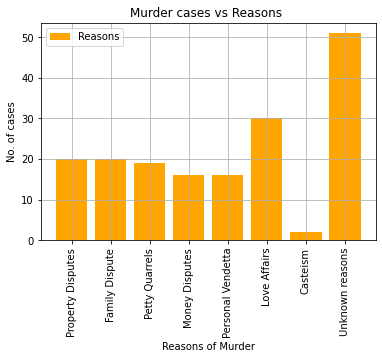

In [164]:
import matplotlib.pyplot as plt
left=[1,2,3,4,5,6,7,8]

plt.xticks(left,reason,rotation=90)
plt.title("Murder cases vs Reasons ")
plt.ylabel("No. of cases")
plt.xlabel("Reasons of Murder")
plt.bar(left,rr,width=0.8,label="Reasons",color='orange')
plt.grid()
plt.legend()
